# Диагностические тесты на автокорреляцию

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.api as sms # тесты
from scipy.stats import chi2 # 𝜒2-распределение

## Icecream equation

Рассмотрим набор данных `Icecream`: Недельные данные по потреблению мороженого

* cons (потребление мороженого на одного человека в пинтах)
* income (средний недельных доход семьи)
* price (цена мороженого за пинту)
* temp (средняя температура по Фаренгейту)

и регрессию **cons на income, price, temp**. Спецификация модели с серийной корреляцией первого порядка
\begin{align*}
    cons_t&=\beta_0+\beta_1 income_t+\beta_2 price_t+\beta_3 temp_t+u_t & u_t=\rho u_{t-1}+v_t
\end{align*}

Результаты подгонки

In [20]:
icecream_df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/icecream.csv')
mod_ice = smf.ols(formula='cons~income+price+temp', data=icecream_df).fit()
mod_ice.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cons   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.687
No. Observations:                  30   F-statistic:                     22.17
Covariance Type:            nonrobust   Prob (F-statistic):           2.45e-07
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1973      0.270      0.730      0.472      -0.358       0.753
income         0.0033      0.001      2.824      0.009       0.001       0.006
price         -1.0444      0.834     -1.252      0.222      -2.759       0.671
temp           0.0035      0.000      7.762      0.000       0.003       0.004
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Диагностический DW-тест на серинйю корреляцию: $H_0:\rho=0$ vs $H_1:\rho\ne0$

Тестовая статистика

In [21]:
sms.durbin_watson(resids=mod_ice.resid)

1.021169312283382

Число наблюдений и число регрессоров

In [22]:
print('Число наблюдений=', mod_ice.nobs)
print('Число регрессоров=', mod_ice.df_model)

Число наблюдений= 30.0
Число регрессоров= 3.0


5%-критические значения: $d_l=1.214$ $d_u=1.650$ (из спец.таблицы)

Какие можно сделать выводы?

## Consumption equation 1

Для набора данных Consumption рассморим регессию с серийно коррецяией первого порядка

Модель с серийной корреляцией первого порядка
\begin{align*}
    \Delta\log(yd_t)&=\beta_0+\beta_1\Delta\log(ce_t)+u_t & u_t&=\rho u_{t-1}+v_t
\end{align*}

Загрузим датасет и добавим первые разности переменных

In [2]:
cons_df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/Consumption.csv')
# добавим первые разности к датасету использую метод .diff()
cons_df[['d_log_yd', 'd_log_ce']] = np.log(cons_df[['yd', 'ce']]).diff()
cons_df.head()

,Unnamed: 0,yd,ce,d_log_yd,d_log_ce
0,1,59505.0,57168,NaN,NaN
1,2,59717.4,55464,0.003563,-0.030260
2,3,59039.1,56332,-0.011423,0.015529
3,4,61342.6,55836,0.038275,-0.008844
4,5,60544.6,54488,-0.013094,-0.024438


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

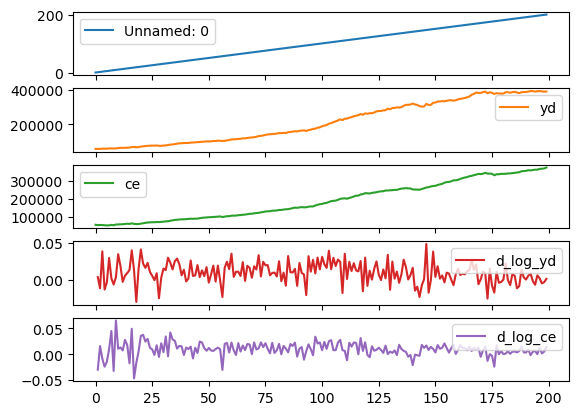

In [3]:
cons_df.plot(subplots=True)

Результаты подгонки

In [38]:
mod_cons = smf.ols(formula='d_log_yd~d_log_ce', data=cons_df).fit()
mod_cons.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               d_log_yd   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.128
No. Observations:                 199   F-statistic:                     30.06
Covariance Type:            nonrobust   Prob (F-statistic):           1.27e-07
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0059      0.001      5.252      0.000       0.004       0.008
d_log_ce       0.3706      0.068      5.483      0.000       0.237       0.504
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Диагностический DW-тест на серинйю корреляцию: $H_0:\rho=0$ vs $H_1:\rho\ne0$

Тестовая статистика

In [39]:
sms.durbin_watson(resids=mod_cons.resid)

2.3820741077865417

In [40]:
print('Число наблюдений=', mod_cons.nobs)
print('Число регрессоров=', mod_cons.df_model)

Число наблюдений= 199.0
Число регрессоров= 1.0


5%-критические значения: $d_l=1.758$ $d_u=1.779$ (из спец.таблицы)

Какие можно сделать выводы?

Диагностический BG-тест на серийную корреляцию первого порядка $H_0:\rho=0$ vs $H_1:\rho\ne0$

In [41]:
LM, LMpval, F, Fpval = sms.acorr_breusch_godfrey(mod_cons, nlags=1)
LM, LMpval

(7.607335705809491, 0.005813131344197056)

5%-критическое значение $\chi^2_{df=1}$

In [29]:
chi2.ppf(q=1-0.05, df=1)

3.841458820694124

Какие можно сделать выводы?

## Consumption equation 3

Для набора данных Consumption рассморим регессию с серийно коррецяией **третьего** порядка

Модель с серийной корреляцией первого порядка
\begin{align*}
    \Delta\log(yd_t)&=\beta_0+\beta_1\Delta\log(ce_t)+u_t & u_t&=\rho_1 u_{t-1}+\rho_2 u_{t-2}+\rho_3 u_{t-3}+v_t
\end{align*}

Загрузим датасет и добавим первые разности переменных

In [42]:
cons_df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/Consumption.csv')
# добавим первые равности к датасету использую метод .diff()
cons_df[['d_log_yd', 'd_log_ce']] = np.log(cons_df[['yd', 'ce']]).diff()
cons_df.head()

,Unnamed: 0,yd,ce,d_log_yd,d_log_ce
0,1,59505.0,57168,NaN,NaN
1,2,59717.4,55464,0.003563,-0.030260
2,3,59039.1,56332,-0.011423,0.015529
3,4,61342.6,55836,0.038275,-0.008844
4,5,60544.6,54488,-0.013094,-0.024438


Результаты подгонки

In [43]:
mod_cons = smf.ols(formula='d_log_yd~d_log_ce', data=cons_df).fit()
mod_cons.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               d_log_yd   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.128
No. Observations:                 199   F-statistic:                     30.06
Covariance Type:            nonrobust   Prob (F-statistic):           1.27e-07
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0059      0.001      5.252      0.000       0.004       0.008
d_log_ce       0.3706      0.068      5.483      0.000       0.237       0.504
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
LM, LMpval, F, Fpval = sms.acorr_breusch_godfrey(mod_cons, nlags=3)
LM, LMpval

(9.376799456296979, 0.02467877970741734)

1%-критическое значение $\chi^2_{df=3}$

In [35]:
chi2.ppf(q=1-0.01, df=3)

11.344866730144373

Какие можно сделать выводы?